# <span style= 'color: green'> **Where should I live?** </span> <br>
## Leveraging Data to Optimize Quality of Life Choices
### Group Project of Programming for Data Science 2025/26 <br>
Angelica Lamberti 20250999 <br>
Samuel Nazzaro <br>
Efe <br>
Maddleine 

 <span style= 'color: red'>**Introduction** </span> <br> In the wake of increasing mobility across Europe, fueled by remote work, international education, and shifting social and economic priorities, there has been growing demand for tools that help citizens make better-informed decisions about where to live. <br>
 <span style= 'color: red'> **Objectives** </span> <br>
-Design a tool that translates complex country-level data into clear, actionable insights for everyday people: students seeking affordable education, professionals looking for better work-life balance, retirees interested in safety and healthcare, and more. <br>
-Simplify this decision-making process by analyzing key characteristics of European countries, such as cost of living, safety, and employment. Through exploratory analysis, visualizations, and interpretable insights, the goal is to build a framework that empowers users to evaluate which countries align best with their personal values and life goals.

In [157]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re 

## <span style= 'color: blue'> 1.  Data wrangling and analysis </span>

In [158]:
#Importing the data
data= pd.read_csv('city_data.csv', sep='|', header=1, parse_dates=['Last Data Update'])

print('Dimension of the data set:', data.shape) #The dataset has 86 rows and 14 columns
data.head()

Dimension of the data set: (86, 14)


,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17


### **Exploratory Analysis**
**Question 1** How did you handle missing values and duplicate records in the dataset? 

In [159]:
data.info()
#We have 80 missing values for Average Price Groceries, 
#1 for Population Density, 
#1 for Working Age Population, 
#1 for Unemployment Rate, 
#1 for GDP per Capita, 
#1 for Main Spoken Languages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             86 non-null     object        
 1   Population Density               85 non-null     float64       
 2   Population                       86 non-null     int64         
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float64       
 5   Unemployment Rate                85 non-null     float64       
 6   GDP per Capita                   85 non-null     float64       
 7   Days of very strong heat stress  86 non-null     int64         
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     int64         
 10  Avgerage Rent Price              86 non-null     int64         


Since the Average Price Groceries column contains more than 90% missing values, it provides limited analytical value. Therefore, this variable will be excluded from further analysis. To preserve the integrity of the original dataset, a copy—named data_copy—is created, and all the changes will be applied to this duplicate.

In [160]:
data_copy=data.drop('Average Price Groceries', axis=1)
data_copy

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08


In [161]:
#Are there duplicate records?
data_copy['City'].describe()

count                  86
unique                 84
top       Berlin. Germany
freq                    2
Name: City, dtype: object

In [162]:
data_copy['City'].value_counts()

City
Berlin. Germany           2
Malaga, Spain             2
Vienna, Austria           1
Rotterdam, Netherlands    1
The Hague, Netherlands    1
                         ..
Madrid, Spain             1
Odense, Denmark           1
Copenhagen, Denmark       1
Hanover, Germany          1
Adana, Turkiye            1
Name: count, Length: 84, dtype: int64

The entries “Berlin, Germany” and “Malaga, Spain” appear twice in the dataset, suggesting that they may represent duplicate records. The next step is to check that info are actually the same. For this purpose we are going to do some text mining to clean the dataset and access to information in a more efficient way.

In [1]:
citycountry_list=data_copy['City'].unique()
print (citycountry_list)

NameError: name 'data_copy' is not defined

Since the 'City' columns contains 2 pieces of information, city and country, we want to split this column in 2 different columns: 1 for cities and the other for countries. 

In [164]:
data_copy = data_copy.rename(columns={'City': 'city&country'}) 

In [165]:
data_copy['city&country'] = data_copy['city&country'].str.replace('[;.]', ',', regex=True)\
    .str.replace(r'\s+', ' ', regex=True)\
    .str.strip()\
    .str.replace('Greece, Athens', 'Athens, Greece')

In [166]:
#Now we can delete duplicate rows
data_copy = data_copy.drop_duplicates(subset='city&country', keep='first')
data_copy = data_copy.reset_index(drop=True)
data_copy

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
80,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
81,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07
82,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08


In [167]:
data_copy['City']=data_copy['city&country'].str.split(',', n=1, expand=True)[0]
data_copy['Country']=data_copy['city&country'].str.split(',', n=1, expand=True)[1]

data_copy['City'] = data_copy['City'].str.strip()
data_copy['Country'] = data_copy['Country'].str.strip()

data_copy

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update,City,Country
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,Vienna,Austria
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,Salzburg,Austria
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,Brussels,Belgium
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,Antwerp,Belgium
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,Gent,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11,Stockholm,Sweden
80,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10,Gothenburg,Sweden
81,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07,Malmo,Sweden
82,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08,Ankara,Turkiye


In [168]:
data_copy['city&country'].unique().tolist()

['Vienna, Austria',
 'Salzburg, Austria',
 'Brussels, Belgium',
 'Antwerp, Belgium',
 'Gent, Belgium',
 'Bruges, Belgium',
 'Sofia, Bulgaria',
 'Dobrich, Bulgaria',
 'Zurich, Switzerland',
 'Geneva, Switzerland',
 'Basel, Switzerland',
 'Lefkosia, Cyprus',
 'Lemesos,Cyprus',
 'Prague, Czechia',
 'Ostrava, Czechia',
 'Berlin, Germany',
 'Hamburg, Germany',
 'Munich, Germany',
 'Cologne, Germany',
 'Frankfurt am Main, Germany',
 'Stuttgart, Germany',
 'Leipzig, Germany',
 'Dresden, Germany',
 'Dusseldorf, Germany',
 'Hanover, Germany',
 'Copenhagen, Denmark',
 'Odense, Denmark',
 'Madrid, Spain',
 'Barcelona, Spain',
 'Valencia, Spain',
 'Seville, Spain',
 'Malaga, Spain',
 'Tallinn, Estonia',
 'Helsinki, Finland',
 'Tampere, Finland',
 'Paris, France',
 'Lyon, France',
 'Toulouse, France',
 'London, United Kingdom',
 'Leeds, United Kingdom',
 'Glasgow, United Kingdom',
 'Liverpool, United Kingdom',
 'Edinburgh, United Kingdom',
 'Athens, Greece',
 'Thessaloniki, Greece',
 'Zagreb, Croat

**Question 2.a** Which country appears most frequently in the dataset? How many cities are associated with it?

In [169]:
countries_count = data_copy['Country'].value_counts()
countries_count

Country
Germany            10
Italy               6
Spain               5
Netherlands         5
United Kingdom      5
Belgium             4
Portugal            4
Hungary             3
Sweden              3
Switzerland         3
Poland              3
Norway              3
France              3
Ireland             2
Austria             2
Croatia             2
Greece              2
Finland             2
Denmark             2
Czechia             2
Cyprus              2
Bulgaria            2
Turkiye             2
Luxembourg          1
Latvia              1
Malta               1
Estonia             1
Romania             1
Slovak Republic     1
Slovenia            1
Name: count, dtype: int64

Germany is the most frequently represented country in the dataset, appearing 10 times. This indicates that 10 different cities are associated with Germany.

In [170]:
data_copy[data_copy['Country']=='Germany']

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update,City,Country
15,"Berlin, Germany",304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,2023-06-29,Berlin,Germany
16,"Hamburg, Germany",461.0,3315036,2181857.0,21.5,3.2,61058.0,0,"German, English, Turkish",3500,1100,2100,2024-07-10,Hamburg,Germany
17,"Munich, Germany",529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16,Munich,Germany
18,"Cologne, Germany",1233.0,2002550,1335299.0,20.8,3.9,60310.0,3,"German, English, Turkish",3200,1030,2000,2024-11-23,Cologne,Germany
19,"Frankfurt am Main, Germany",631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04,Frankfurt am Main,Germany
20,"Stuttgart, Germany",763.0,2787449,1843613.0,21.2,2.5,67644.0,3,"German, Turkish",3300,1300,2300,2024-05-19,Stuttgart,Germany
21,"Leipzig, Germany",263.0,1043613,662617.0,21.4,4.3,41097.0,3,German,2800,800,1600,2023-07-30,Leipzig,Germany
22,"Dresden, Germany",231.0,1343213,818095.0,23.0,3.8,39767.0,0,German,3050,800,1530,2023-08-01,Dresden,Germany
23,"Dusseldorf, Germany",1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15,Dusseldorf,Germany
24,"Hanover, Germany",444.0,1316467,854349.0,21.0,4.0,54827.0,2,German,2800,900,1800,2023-10-07,Hanover,Germany


**Question 2.b** How many cities are present in total? How many are associated with Greece? 

In [171]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   city&country                     84 non-null     object        
 1   Population Density               83 non-null     float64       
 2   Population                       84 non-null     int64         
 3   Working Age Population           83 non-null     float64       
 4   Youth Dependency Ratio           84 non-null     float64       
 5   Unemployment Rate                83 non-null     float64       
 6   GDP per Capita                   83 non-null     float64       
 7   Days of very strong heat stress  84 non-null     int64         
 8   Main Spoken Languages            83 non-null     object        
 9   Average Monthly Salary           84 non-null     int64         
 10  Avgerage Rent Price              84 non-null     int64         


In [172]:
columns=data_copy.columns.to_list()
data_copy = data_copy[columns[-2:] + columns[:-2]]
data_copy=data_copy.drop('city&country', axis=1)
#Putting the city and country columns as the first and second ones: it's better for visualization.

In [173]:
cities_sum = data_copy['City'].value_counts().sum()
print('In total there are ', cities_sum, 'cities')

cities_count=data_copy['Country'].value_counts()
print(cities_count)

In total there are  84 cities
Country
Germany            10
Italy               6
Spain               5
Netherlands         5
United Kingdom      5
Belgium             4
Portugal            4
Hungary             3
Sweden              3
Switzerland         3
Poland              3
Norway              3
France              3
Ireland             2
Austria             2
Croatia             2
Greece              2
Finland             2
Denmark             2
Czechia             2
Cyprus              2
Bulgaria            2
Turkiye             2
Luxembourg          1
Latvia              1
Malta               1
Estonia             1
Romania             1
Slovak Republic     1
Slovenia            1
Name: count, dtype: int64


A total of 84 cities are included in the dataset. Two of them are associated with Greece: Athens and Zagreb.

In [174]:
data_copy.set_index('Country', inplace=True)
data_copy.index

Index(['Austria', 'Austria', 'Belgium', 'Belgium', 'Belgium', 'Belgium',
       'Bulgaria', 'Bulgaria', 'Switzerland', 'Switzerland', 'Switzerland',
       'Cyprus', 'Cyprus', 'Czechia', 'Czechia', 'Germany', 'Germany',
       'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany',
       'Germany', 'Germany', 'Denmark', 'Denmark', 'Spain', 'Spain', 'Spain',
       'Spain', 'Spain', 'Estonia', 'Finland', 'Finland', 'France', 'France',
       'France', 'United Kingdom', 'United Kingdom', 'United Kingdom',
       'United Kingdom', 'United Kingdom', 'Greece', 'Greece', 'Croatia',
       'Croatia', 'Hungary', 'Hungary', 'Hungary', 'Ireland', 'Ireland',
       'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Italy', 'Luxembourg',
       'Latvia', 'Malta', 'Netherlands', 'Netherlands', 'Netherlands',
       'Netherlands', 'Netherlands', 'Norway', 'Norway', 'Norway', 'Poland',
       'Poland', 'Poland', 'Portugal', 'Portugal', 'Portugal', 'Portugal',
       'Romania', 'Slovak Republic'

**Question 2.c** Which is the least spoken language in the dataset? Which are the top 3 most spoken languages? 

In [175]:
#First, we want to clean the column to access each language
data_copy['Languages'] = data_copy['Main Spoken Languages'].str.split(',')
lan = data_copy['Languages'].explode().dropna()
lan = lan.str.strip()
count = lan.value_counts()
    
most_spoken_3=lan.value_counts().head(3)
least_spoken=lan.value_counts().idxmin()
print("Most spoken top 3", most_spoken_3)
print("Least spoken language is", least_spoken)

Most spoken top 3 Languages
English    46
German     14
Turkish    10
Name: count, dtype: int64
Least spoken language is Latvian


At third place, with 10 occurrencies we have both Turkish and French. The least spoken languages are Latvian, Maltese, Serbian, Romanian, Slovak, ScotsGaelic, Luxemboutgish, Scots, Bengali, Estonian, Valencian, Catalan and Slovene. Each of these languages occur only once.

**Question 3.a** Entries uploaded before April 2023 need to be updated. Which cities would require an update? 

In [176]:
begin_April_23=pd.to_datetime('2023-04-1')
filter=data_copy[data_copy['Last Data Update']< begin_April_23]
filter['City']

Country
Switzerland                Basel
Germany                   Munich
Germany        Frankfurt am Main
France                      Lyon
Italy                     Venice
Sweden                Gothenburg
Name: City, dtype: object

The cities Basel, Munich, Frankfurt am Main, Lyon, Venice, and Gothenburg require an update, as their most recent data revisions date back to before April 2023.

**Question 3.b** How many days ago was the last update? On what day, month, and year did it occur? 

In [177]:
date_today= pd.Timestamp('today').normalize()
last_update=max(data_copy['Last Data Update'])
days= (date_today-last_update).days
print('The last update was', days, 'days ago')
print('The last update was on', last_update)

The last update was 349 days ago
The last update was on 2024-12-12 00:00:00


**Question 4.a** How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest? Provide a visual representation.

In [178]:
unemployment_rate=data_copy['Unemployment Rate']
GDP_per_capita=data_copy['GDP per Capita']

#We can drop the missing values from these columns
unempl_GDP = data_copy.loc[:, ('Unemployment Rate', 'GDP per Capita')].dropna(subset=["Unemployment Rate", "GDP per Capita"])
unempl_GDP

,Unemployment Rate,GDP per Capita
Country,,
Austria,10.2,55770.0
Austria,3.0,66689.0
Belgium,10.7,62500.0
Belgium,6.2,57595.0
Belgium,5.6,63083.0
...,...,...
Sweden,6.2,70950.0
Sweden,6.3,49588.0
Sweden,9.2,44387.0


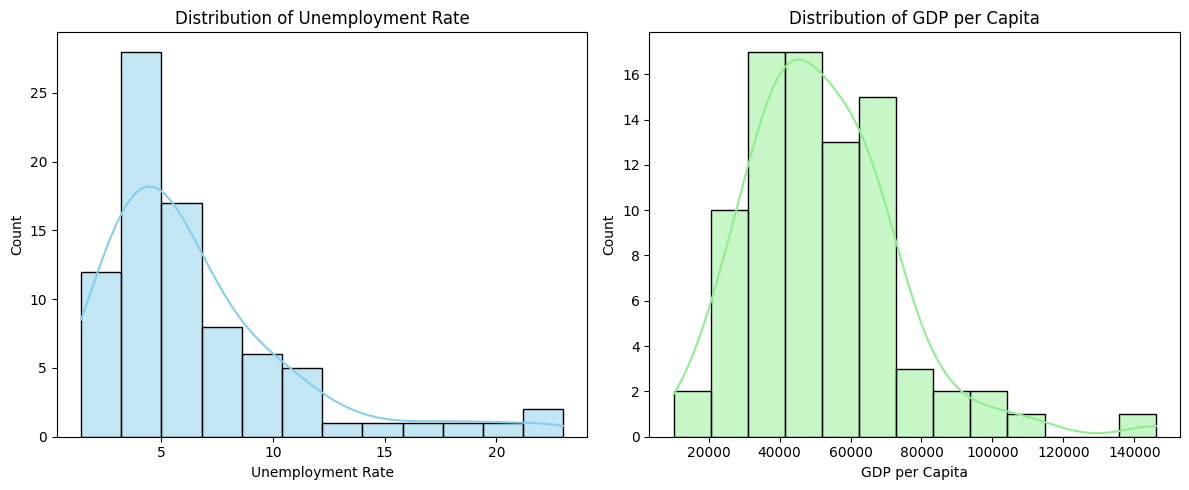

In [179]:
#How are Unemployement Rate and GDP per Capita distributed?
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(unemployment_rate, kde=True, color='skyblue')
plt.title('Distribution of Unemployment Rate')

plt.subplot(1,2,2)
sns.histplot(GDP_per_capita, kde=True, color='lightgreen')
plt.title('Distribution of GDP per Capita')

plt.tight_layout()
plt.show()

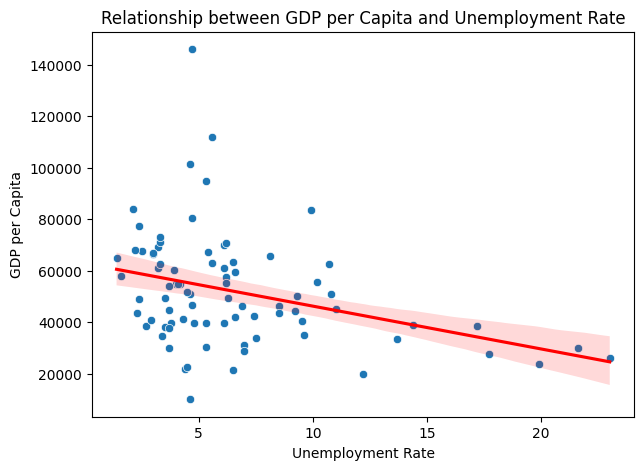

In [180]:
#Relationship between GDP per Capita and Unemployment Rate
plt.figure(figsize=(7,5))
sns.scatterplot(data=unempl_GDP, x= 'Unemployment Rate', y= 'GDP per Capita')
sns.regplot(data=unempl_GDP, x= 'Unemployment Rate', y= 'GDP per Capita', scatter=False, color='red')
plt.title('Relationship between GDP per Capita and Unemployment Rate')
plt.show()

The scatter plot illustrates the relationship between GDP per Capita and the Unemployment Rate.
The trend line shows a negative correlation between the two variables: as the unemployment rate increases, GDP per capita tends to decrease. This suggests that cities with higher unemployment rates generally exhibit lower levels of economic productivity per person.
However, the dispersion of data points indicates a certain degree of variability: some locations deviate from the general trend, showing relatively high GDP per capita even with moderate unemployment rates. The shaded region around the regression line suggest that while the overall relationship is negative, it is not perfectly linear.
Let's calclulate the Pearson correlation coefficient (we expect it to be negative).

In [188]:
corr = data_copy['GDP per Capita'].corr(data_copy['Unemployment Rate'])
print(f"Correlation: {corr:.2f}")

Correlation: -0.34


**Question 4.b** Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations. 

In [193]:
#top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living
data_copy['diff']=data_copy['Average Monthly Salary']-data_copy['Average Cost of Living']
data_copy = data_copy.sort_values(by='diff')
data_copy.tail()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update,Languages,diff
Country,,,,,,,,,,,,,,,
Switzerland,Geneva,1112.0,597269,404313.0,23.8,9.9,83747.0,1,"French, English",5794,2818,4263,2024-09-28,"[French, English]",1531
Switzerland,Zurich,1058.0,1384728,939270.0,22.3,4.7,80431.0,4,"German, English",6636,3190,4862,2023-05-06,"[German, English]",1774
Finland,Helsinki,322.0,1507140,1004835.0,25.1,6.6,59502.0,0,"Finnish, Swedish, English",3900,1050,2050,2023-09-12,"[Finnish, Swedish, English]",1850
Finland,Tampere,65.0,444370,283876.0,25.6,6.6,41954.0,0,Finnish,3500,850,1600,2024-04-29,[Finnish],1900
Switzerland,Basel,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19,"[German, English, French]",2127


The top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living are:
1. Basel
2. Tampere
3. Helsinki
4. Zurich
5. Geneva 

In [196]:
#top 5 countries with the smallest average difference
data_copy.head(8)

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update,Languages,diff
Country,,,,,,,,,,,,,,,
Portugal,Lisbon,695.0,3008000,1871604.0,25.4,7.4,42363.0,1,"Portuguese, English",1220,1050,1600,2024-10-04,"[Portuguese, English]",-380
Portugal,Porto,1343.0,1280190,840851.0,20.5,7.0,31339.0,0,Portuguese,1100,900,1400,2023-05-23,[Portuguese],-300
Greece,Athens,1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16,"[Greek, English]",-150
Greece,Thessaloniki,381.0,1050568,684564.0,22.2,19.9,23940.0,10,Greek,1000,550,1100,2023-12-21,[Greek],-100
Italy,Venice,852.0,557748,347781.0,19.3,6.1,39681.0,6,Italian,1400,1150,1500,2023-03-23,[Italian],-100
Portugal,Braga,501.0,247719,169611.0,20.3,7.0,28783.0,1,Portuguese,1000,700,1100,2024-01-31,[Portuguese],-100
Poland,Cracow,376.0,1410424,938323.0,23.7,2.9,40721.0,0,"Polish, English",1400,1000,1500,2023-07-11,"[Polish, English]",-100
Turkiye,Adana,552.0,1074543,718256.0,37.8,12.2,19945.0,59,Turkish,750,350,800,2024-05-02,[Turkish],-50


The top 5 countries with the smallest average difference are:
1. Portugal
2. Greece
3. Italy
4. Poland
5. Turkiye

**Question 4.c** Which is the best city for someone seeking: <br>
-An average monthly salary above €2000; <br>
-A cost of living below or equal to €1600 <br>
-A country suitable for starting a family (with a relatively larger youth population)?

In [202]:
data_copy=data_copy.drop(coulmuns=['diff'])
youth_mean=data_copy['Youth Dependency Ratio'].mean()
data_copy[(data_copy['Average Monthly Salary']>2000)&(data_copy['Average Cost of Living']<=1600)&(data_copy['Youth Dependency Ratio']>youth_mean)]

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update,Languages,diff
Country,,,,,,,,,,,,,,,
France,Toulouse,4300.0,511684,401425.0,27.31,8.5,46226.0,14,French,2600,800,1600,2024-02-20,[French],1000
Spain,Seville,330.0,1549641,1037225.0,25.00,21.6,30004.0,53,Spanish,2300,650,1150,2024-09-01,[Spanish],1150
Belgium,Gent,552.0,645813,417832.0,24.80,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,"[Dutch, French]",1200
Finland,Tampere,65.0,444370,283876.0,25.60,6.6,41954.0,0,Finnish,3500,850,1600,2024-04-29,[Finnish],1900


The best city for someone seeking the characteristics above is Touluse, since it has the highest rate of young population and meets the other conditions too.
Also Seville, Gent and Tempere are suitable cities for someone looking for these features.

**Question 5** What are three additional insights you find meaningful when comparing the given cities?

In [80]:
#CODE HERE

## <span style= 'color: blue'> 2. Interactive Map </span>

The goal of this section is to create an interactive map of Europe where users can explore cities and view relevant information such as country, population, average salary, and cost of living.

### Web scraping